In [1]:
# IMPORTING LIBRARIES AND USABLE PACKAGES
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #to convert the original features into their higher order terms 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('new_data.csv') # UPLOAD DATASET
df.head()

,Unnamed: 0,Depature Airport,Destination Airport,DEP Date,DEP Year,DEP Month,DEP Day,DEP weekday,DEP Time,ARR Date,ARR Year,ARR Month,ARR Day,ARR weekday,ARR Time,Fligh Duration Time,Delay
0,0,144,56,0,2015,10,27,1,92,0,2015,10,27,1,256,785.0,0.0
1,1,144,68,0,2015,10,27,1,118,0,2015,10,27,1,254,645.0,2.0
2,2,144,94,0,2015,10,27,1,129,0,2015,10,27,1,291,770.0,0.0
3,3,144,82,0,2015,10,27,1,150,1,2015,10,28,2,16,770.0,0.0
4,4,113,143,0,2015,10,27,1,171,0,2015,10,27,1,206,145.0,9.0


In [3]:
# REMOVING 1ST COLUMN
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

Shapes are same:   True


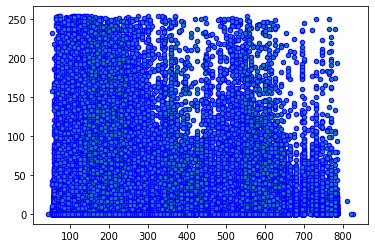

In [4]:
# SPLITTING DATASET
# FOR USING POLYNOMIAL REGRESSION MODEL WE SPLIT ONLY Fligh Duration Time and Delay
# PREDICTOR: Fligh Duration Time
# TARGET: Delay
X = np.nan_to_num(df['Fligh Duration Time']).reshape(-1,1) 
y = np.nan_to_num(df['Delay']).reshape(-1,1) 
print('Shapes are same:  ',y.shape == X.shape)
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

MAE:     10.422671156964151
MSE:     476.16694217848874
RMSE:     21.82124978497998
R2 SCORE:    0.005691420827001692


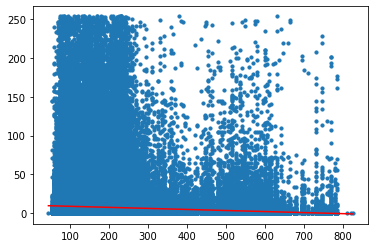

MAE:     10.394214810573805
MSE:     475.46024266295694
RMSE:     21.80505085210665
R2 SCORE:    0.007167116279474417


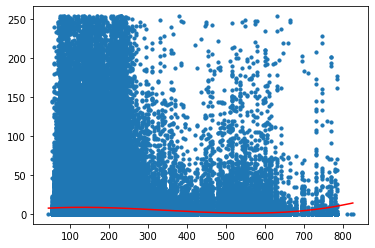

MAE:     10.4521098915151
MSE:     476.7505407247248
RMSE:     21.834617943181986
R2 SCORE:    0.004472778813214395


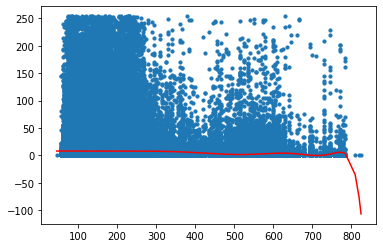

In [7]:
import operator
# TESTING WITH DEGREES
# MEASURING PERFORMANCE

degrees = [1,3,15] 
for i in range(0, len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i])
    x_poly = polynomial_features.fit_transform(X)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    mae = metrics.mean_absolute_error(y, y_poly_pred)
    mse = metrics.mean_squared_error(y,y_poly_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y,y_poly_pred))
    r2 = metrics.r2_score(y,y_poly_pred)

    print('MAE:    ',mae)
    print('MSE:    ', mse)
    print('RMSE:    ', rmse)
    print('R2 SCORE:   ',r2)


    plt.scatter(X, y, s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
    X, y_poly_pred = zip(*sorted_zip)
    plt.plot(X, y_poly_pred, color='red')
    plt.show()